**Problem:**
E-commerce platforms often struggle to effectively target their marketing efforts, resulting in wasted resources and suboptimal customer engagement. This project addresses the challenge of maximizing marketing ROI by identifying distinct customer segments based on their behavior and demographics. Currently, the company's marketing strategies are too broad, failing to personalize the customer experience and capitalize on individual preferences.

**Goal:**
This project aims to develop a data-driven customer segmentation model that will enable the e-commerce platform to personalize marketing campaigns, improve customer retention, and ultimately increase sales.

**Data:** The project will utilize the E-commerce Customer Behavior dataset from kaggle focussing on the follwing :

● **Customer Demographics:** Age, gender, location, membership type etc.

● **Purchase History:** Products purchased, purchase frequency, transaction value

● **Customer Feedback:** Product reviews, satisfaction level/complaints

## Steps:-
### Data Preparation: Steps 1–5
### Modeling: Steps 6–11
### Business Insights: Steps 12–13

1. Load and Inspect the Data
  * Load the dataset.
  * Check missing values, data types.
  * View the first few rows.


2. Data Cleaning
  * Handle missing values.
  * Correct data types.
  * Remove duplicates.
  * Detect and optionally handle outliers.


3. Exploratory Data Analysis (EDA)
  * Univariate plots (histograms, boxplots).
  * Bivariate/multivariate plots (scatterplots, heatmaps).
  * Identify patterns and relationships.


4. Feature Engineering
  * Create new features (e.g., RFM, tenure, average satisfaction).
  * Encode categorical variables.
  * Scale/normalize features if needed.


5. Feature Selection
  * Correlation analysis.
  * Recursive Feature Elimination (optional).
  * Keep only the most useful features.


6. Data Splitting
  * Split data into Train, Validation, and Test sets (e.g., 60/20/20 or 70/15/15).

7. Baseline Model
  * Build a dummy baseline model (DummyClassifier/Regressor).
  * Train a simple model (Logistic Regression, Decision Tree, etc.).
  * valuate using appropriate metrics (Accuracy/Precision/Recall/F1/ROC-AUC for classification, RMSE/MAE/R² for regression).

8. Check Class Imbalance (if classification)
  * Apply resampling or adjust metrics if needed.

9. Prepare Data for Clustering
  * Standardize features (scaling).
  * Apply PCA (optional, for dimensionality reduction).

10. Customer Segmentation
  Apply clustering algorithms:
  * K-Means
  * DBSCAN
  * Hierarchical Clustering

11. Validate clustering results:
  * Elbow Method
  * Silhouette Score

12. Analyze and Profile Segments
  * Define and label customer segments (e.g., "High Value Frequent Buyers", "Bargain Hunters").
  * Analyze demographics and purchase behavior per segment.
  * Suggest targeted marketing actions for each group.

13. Recommendation & Conclusion
  * How marketing can personalize offers based on segment profiles.
  * Predict churners based on low engagement.
  * Recommend targeted campaigns to maximize CLTV.


In [24]:
# ----------------------------------------
# Import the Libraries
# ----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')



In [25]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Berkley/mlai/capstone_project/data/E-commerce_Customer_Behavior.csv')
# Check data types and missing values
df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [26]:
# Check first few rows
df.head()


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [27]:
# Drop rows with missing Satisfaction Level - 2 missing values
df = df.dropna(subset=['Satisfaction Level'])

# Drop Customer ID - (not needed for modeling)
df = df.drop('Customer ID', axis=1)


In [28]:
####Categorical  data###
categorical_data = df.describe(include=['object'])
print(categorical_data)

####Numerical  data###
numerical_data = df.describe(include=['int64', 'float64'])
print(numerical_data)

# Discount Applied as integer
df['Discount Applied'] = df['Discount Applied'].astype(int)

# Categorical Encoding: Gender, City, Membership Type, Satisfaction Level need encoding.
for col in ['Gender', 'Membership Type', 'Satisfaction Level', 'City']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Confirm changes
df.info()

       Gender      City Membership Type Satisfaction Level
count     348       348             348                348
unique      2         6               3                  3
top      Male  New York            Gold          Satisfied
freq      175        59             117                125
              Age  Total Spend  Items Purchased  Average Rating  \
count  348.000000   348.000000       348.000000      348.000000   
mean    33.577586   847.793103        12.632184        4.023563   
std      4.878024   361.692375         4.146079        0.579145   
min     26.000000   410.800000         7.000000        3.000000   
25%     30.000000   505.750000         9.000000        3.500000   
50%     32.000000   780.200000        12.000000        4.100000   
75%     37.000000  1160.600000        15.000000        4.500000   
max     43.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  
count                348.000000  
mean                  26.614943  

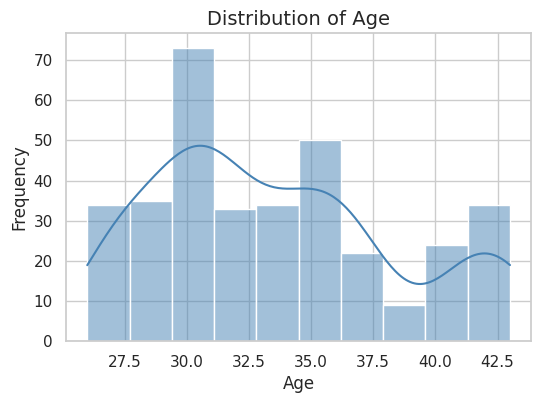

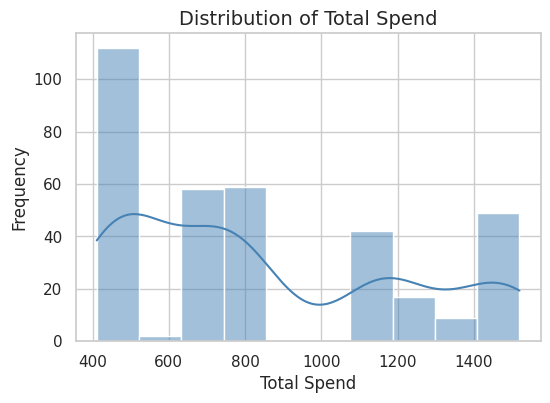

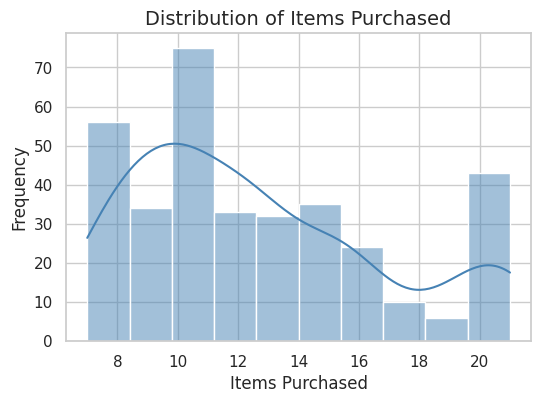

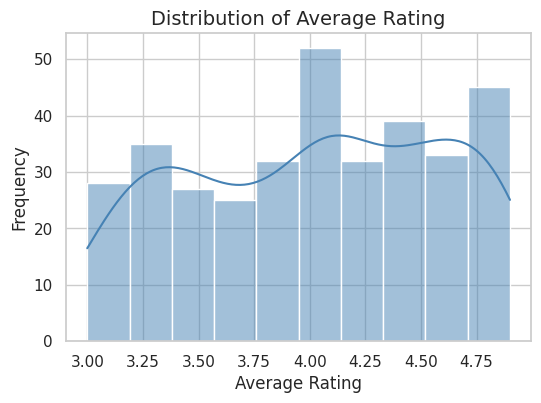

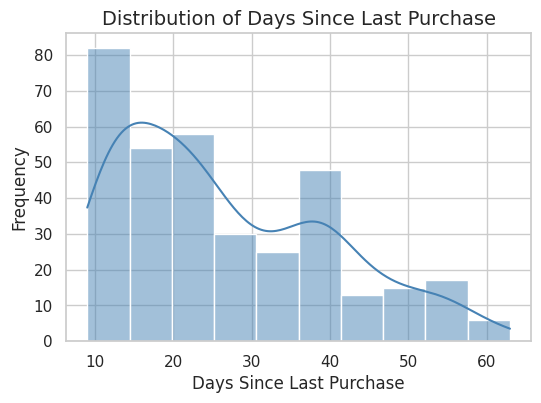

In [29]:
#EDA Analysis
numeric_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color="steelblue")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


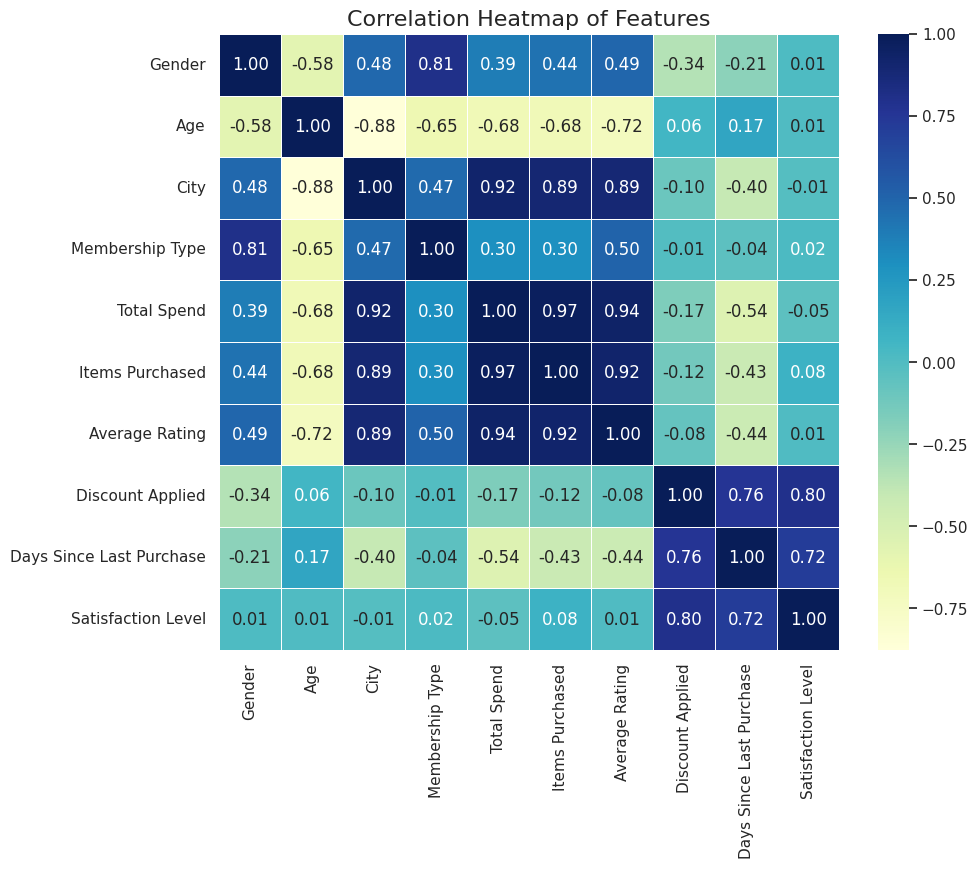

In [30]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()


### Heatmap Inference
This heatmap shows linear correlations.Membership Type and Total Spend (0.81), Items Purchased (0.65), Average Rating (0.50): Membership type seems to have a positive influence on spending, the number of items bought, and the average rating. Different membership tiers might offer benefits that encourage more purchases and potentially lead to higher satisfaction.
Discount Applied and Satisfaction Level (0.80): This strong positive correlation is intuitive. Customers who receive a discount tend to have higher satisfaction levels.
Days Since Last Purchase and Satisfaction Level (0.72): Another positive correlation. Customers who have made a purchase more recently tend to have higher satisfaction levels. This could indicate that recent positive experiences contribute to satisfaction.

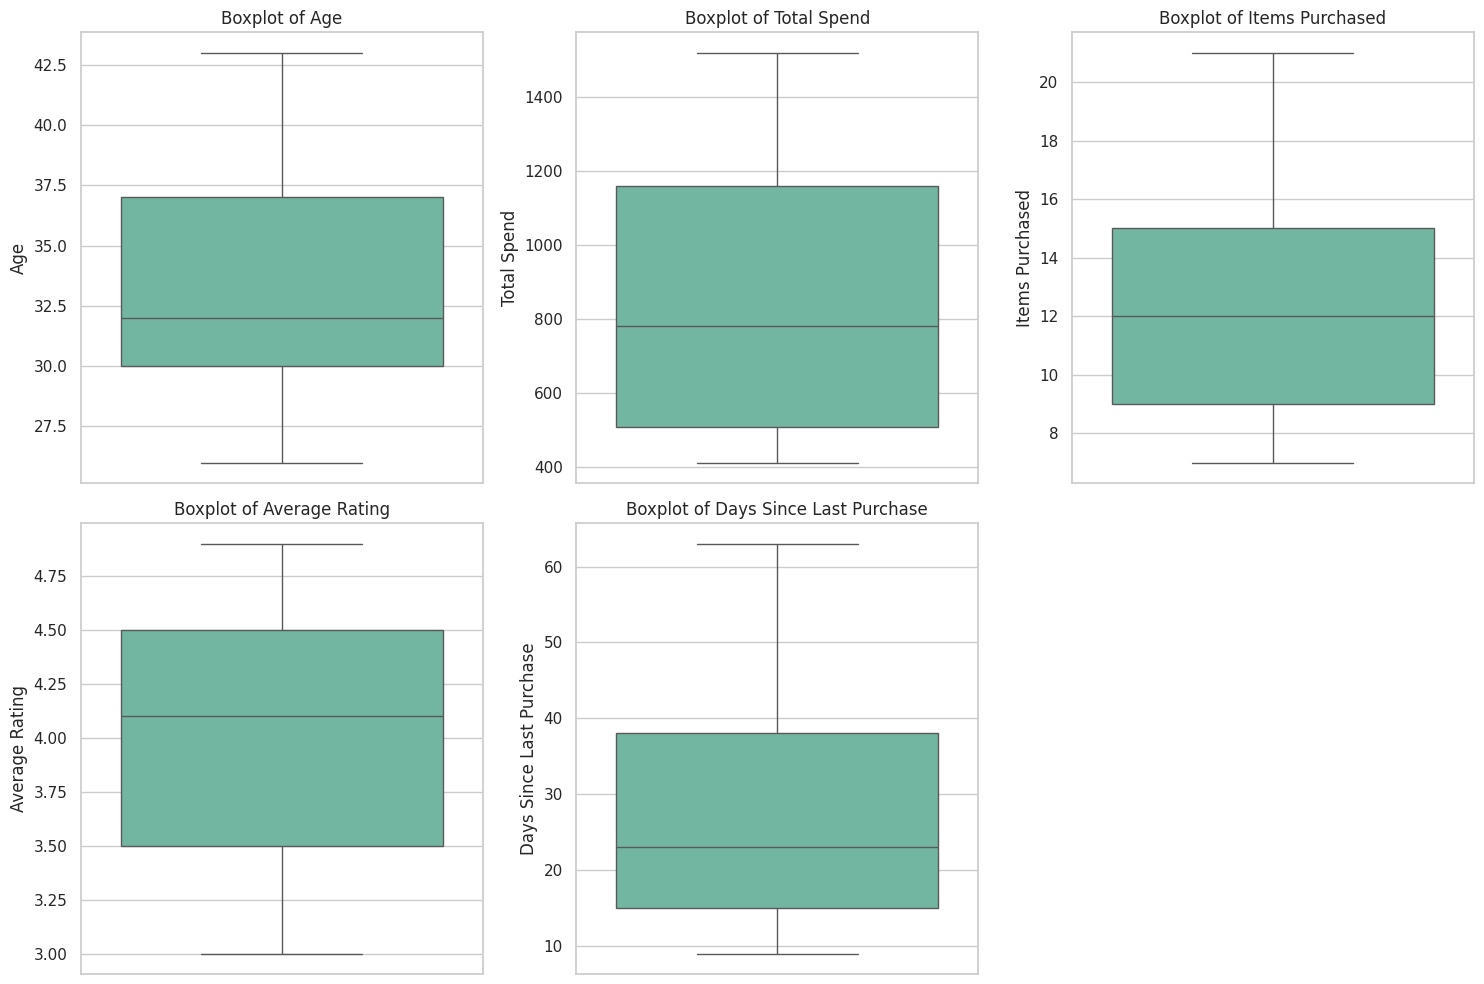

In [32]:
#outlier

numerical_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

# Boxplots for each numerical column
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, idx)
    sns.boxplot(data=df, y=col, palette='Set2')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


#Boxplot outlier analysis
Age: There might be a few data points representing older individuals that fall outside the upper whisker.

Total Spend: There are several potential outliers on the higher end, indicating customers with significantly higher total spending compared to the majority.

Items Purchased: Similar to Total Spend, there are potential outliers on the higher end, representing customers who purchased a much larger number of items.

Average Rating: There are a few potential outliers on the lower end, indicating customers who gave significantly lower average ratings.

Days Since Last Purchase: There are several potential outliers on the higher end, representing customers with a considerably longer time since their last purchase.

In [33]:
# Features and Target and Split data
features = ['Gender', 'Age', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase']
X = df[features]
y = df['Satisfaction Level']

# Split Data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [34]:
# Dummy baseline model
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_val)

print('Dummy Classifier Report:')
print(classification_report(y_val, y_dummy_pred))


Dummy Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        27
           2       0.33      1.00      0.49        23

    accuracy                           0.33        70
   macro avg       0.11      0.33      0.16        70
weighted avg       0.11      0.33      0.16        70



In [35]:
#Logistic Regression (Real Model)
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)

print('Logistic Regression Report:')
print(classification_report(y_val, y_pred))
print(f'ROC-AUC Score: {roc_auc_score(y_val, log_reg.predict_proba(X_val), multi_class="ovr"):.2f}')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        23

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

ROC-AUC Score: 1.00


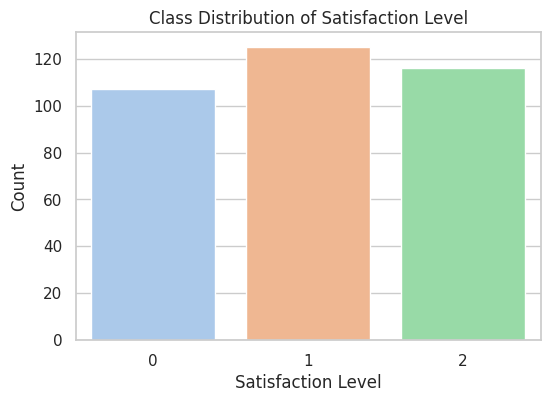

In [36]:
# Class Balance Check
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='pastel')
plt.title('Class Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()


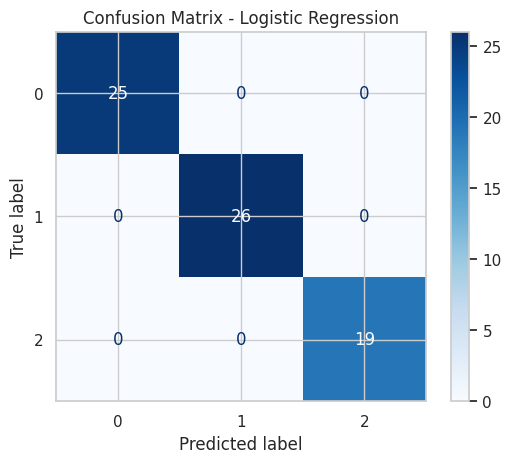

In [37]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [38]:
#Customer Segmentation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


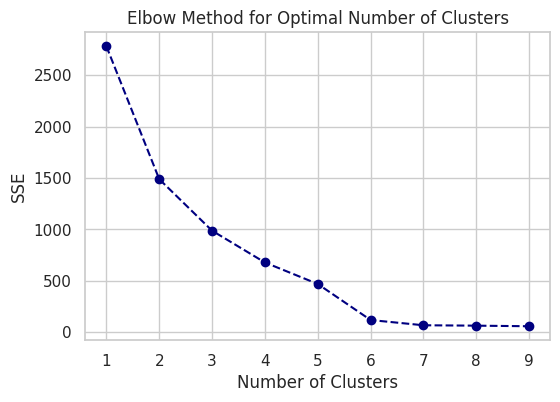

In [39]:
#K-Means clustering
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,10), sse, marker='o', linestyle='--', color='navy')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


In [40]:
#Fit K_Means Clustering

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels for the scaled data
cluster_labels = kmeans.labels_

# Create a new DataFrame with the scaled data and cluster labels
clustered_data = pd.DataFrame(X_scaled, columns=features, index=X.index)
clustered_data['Cluster'] = cluster_labels

# Now, merge the cluster labels back into the original DataFrame
df = pd.merge(df, clustered_data[['Cluster']], left_index=True, right_index=True, how='left')


print('Silhouette Score:', silhouette_score(X_scaled, kmeans.labels_))


Silhouette Score: 0.5777090445722294


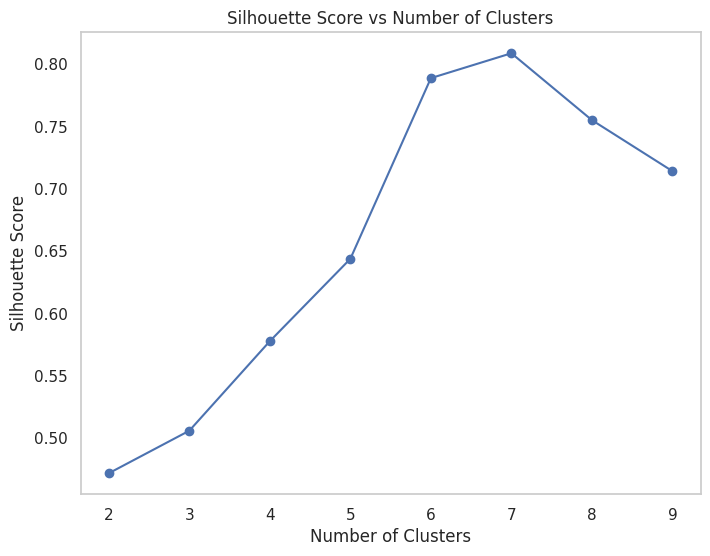

In [41]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X = X_scaled # or whatever you used after scaling
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, preds))

plt.figure(figsize=(8,6))
plt.plot(range(2,10), silhouette_scores, 'bo-')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


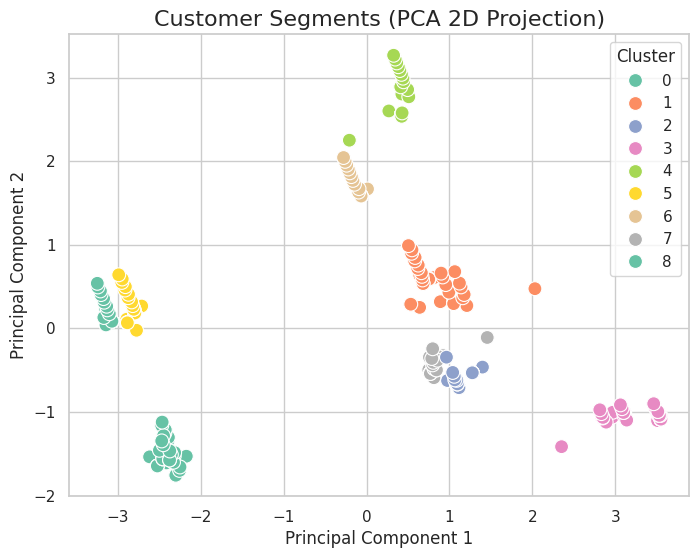

In [42]:
#PCA Visualization of segments
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cluster_labels_series = pd.Series(kmeans.labels_, index=df.index) # Using original index of X


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels_series, palette='Set2', s=100)
plt.title('Customer Segments (PCA 2D Projection)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [43]:
#Segment Analysis
segment_summary = df.groupby('Cluster')[features + ['Satisfaction Level']].mean()
display(segment_summary)


,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
Cluster,,,,,,,,,
0,0.000000,39.403509,0.000000,474.223684,8.517544,3.326316,0.508772,31.780702,1.017544
1,0.365591,29.279570,1.365591,996.370968,14.354839,4.351613,1.000000,35.043011,1.365591
2,1.000000,33.506024,2.000000,766.761446,11.204819,4.065060,0.289157,20.867470,0.674699
3,1.000000,29.120690,1.000000,1459.772414,20.000000,4.808621,0.000000,11.172414,1.000000


Cluster 3 = Top Customers (highest spend, highest loyalty).

Cluster 1 = Young, loyal, discount-driven shoppers.

Cluster 2 = Moderate buyers; opportunity to grow.

Cluster 0 = Low engagement; reactivation needed.





```
Cluster | Key Characteristics | Suggested Marketing Strategy
Cluster 0(Moderate Age, Low Spend) | - Avg Age: ~39 years- Very low total spend ($474)- Low purchases (~8 items)- Medium satisfaction (~3.3/5)- Moderate discount usage (~51%) | - Incentivize purchases with personalized discounts.- Promote loyalty programs to increase engagement.
Cluster 1(Young, Premium Shoppers) | - Avg Age: 29 years<br>- High spenders ($996)- Frequent buyers (~14 items)- High satisfaction (~4.35/5)- Always use discounts (100%) | - Offer VIP membership perks.- Provide exclusive sales and flash deals.- Target upselling/cross-selling campaigns.
Cluster 2(Middle Age, Occasional Buyers) | - Avg Age: 33 years<br>- Medium spenders ($766)- Medium purchasing (~11 items)- Good satisfaction (~4.06/5)- Low discount use (~29%) | - Push loyalty bonuses for non-discount users.- Nudge with product recommendations based on past purchases.
Cluster 3(Young, High-Spend Frequent Buyers) | - Avg Age: 29 years<br>- Extremely high spenders ($1460)- Very frequent buyers (20 items)- Excellent satisfaction (~4.8/5)- No discount usage (0%) | - Prioritize for premium services (white-glove support).- Launch elite membership or invitation-only programs.- Offer personalized, no-discount luxury promotions.
```



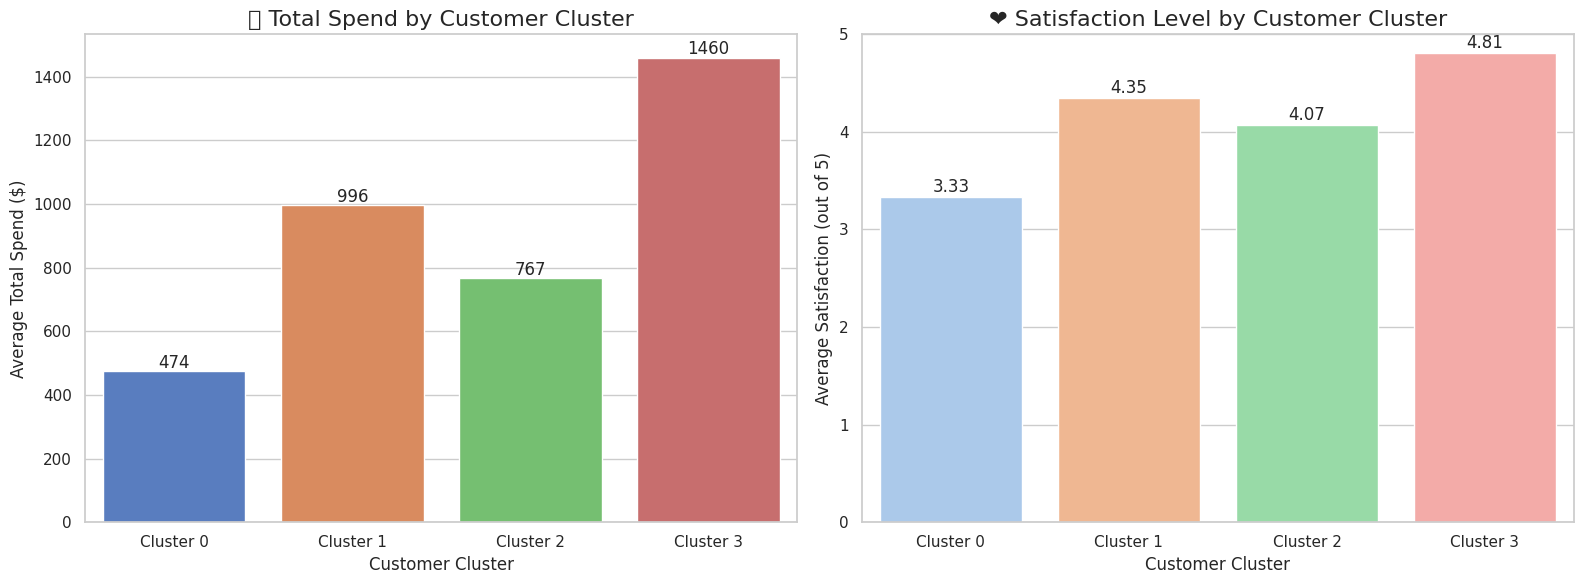

In [44]:

# cluster summary DataFrame
cluster_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'Total Spend': [474.22, 996.37, 766.76, 1459.77],
    'Average Satisfaction': [3.33, 4.35, 4.07, 4.81]
})

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Total Spend Plot ---
sns.barplot(x='Cluster', y='Total Spend', data=cluster_summary, palette='muted', ax=axes[0])
axes[0].set_title('💰 Total Spend by Customer Cluster', fontsize=16)
axes[0].set_xlabel('Customer Cluster')
axes[0].set_ylabel('Average Total Spend ($)')
axes[0].set_xticklabels(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'])

# Add value labels on bars
for bar in axes[0].patches:
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 10,
        f'{bar.get_height():.0f}',
        ha='center',
        fontsize=12
    )

# --- Satisfaction Plot ---
sns.barplot(x='Cluster', y='Average Satisfaction', data=cluster_summary, palette='pastel', ax=axes[1])
axes[1].set_title('❤️ Satisfaction Level by Customer Cluster', fontsize=16)
axes[1].set_xlabel('Customer Cluster')
axes[1].set_ylabel('Average Satisfaction (out of 5)')
axes[1].set_xticklabels(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'])
axes[1].set_ylim(0, 5)

# Add value labels on bars
for bar in axes[1].patches:
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f'{bar.get_height():.2f}',
        ha='center',
        fontsize=12
    )

# Layout adjustment
plt.tight_layout()


# Save the figure to a file
fig.savefig('/content/drive/MyDrive/Berkley/mlai/capstone_project/images/customer_clusters_summary.png', dpi=300, bbox_inches='tight')

plt.show()
